## Credit EDA

In [3]:
#Packages
#for data manipulation and operations
import pandas as pd

#for plotting
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#for statistical modeling
import statsmodels.api as sm
import numpy as np

C:\Users\Matt\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
#read in the data and verify
data = pd.read_csv('creditdata.csv')
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,581.74
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,1259.22
2,104.593,7075,514,4,71,11,Male,No,No,Asian,301.46
3,148.924,9504,681,3,36,11,Female,No,No,Asian,878.14
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,509.92


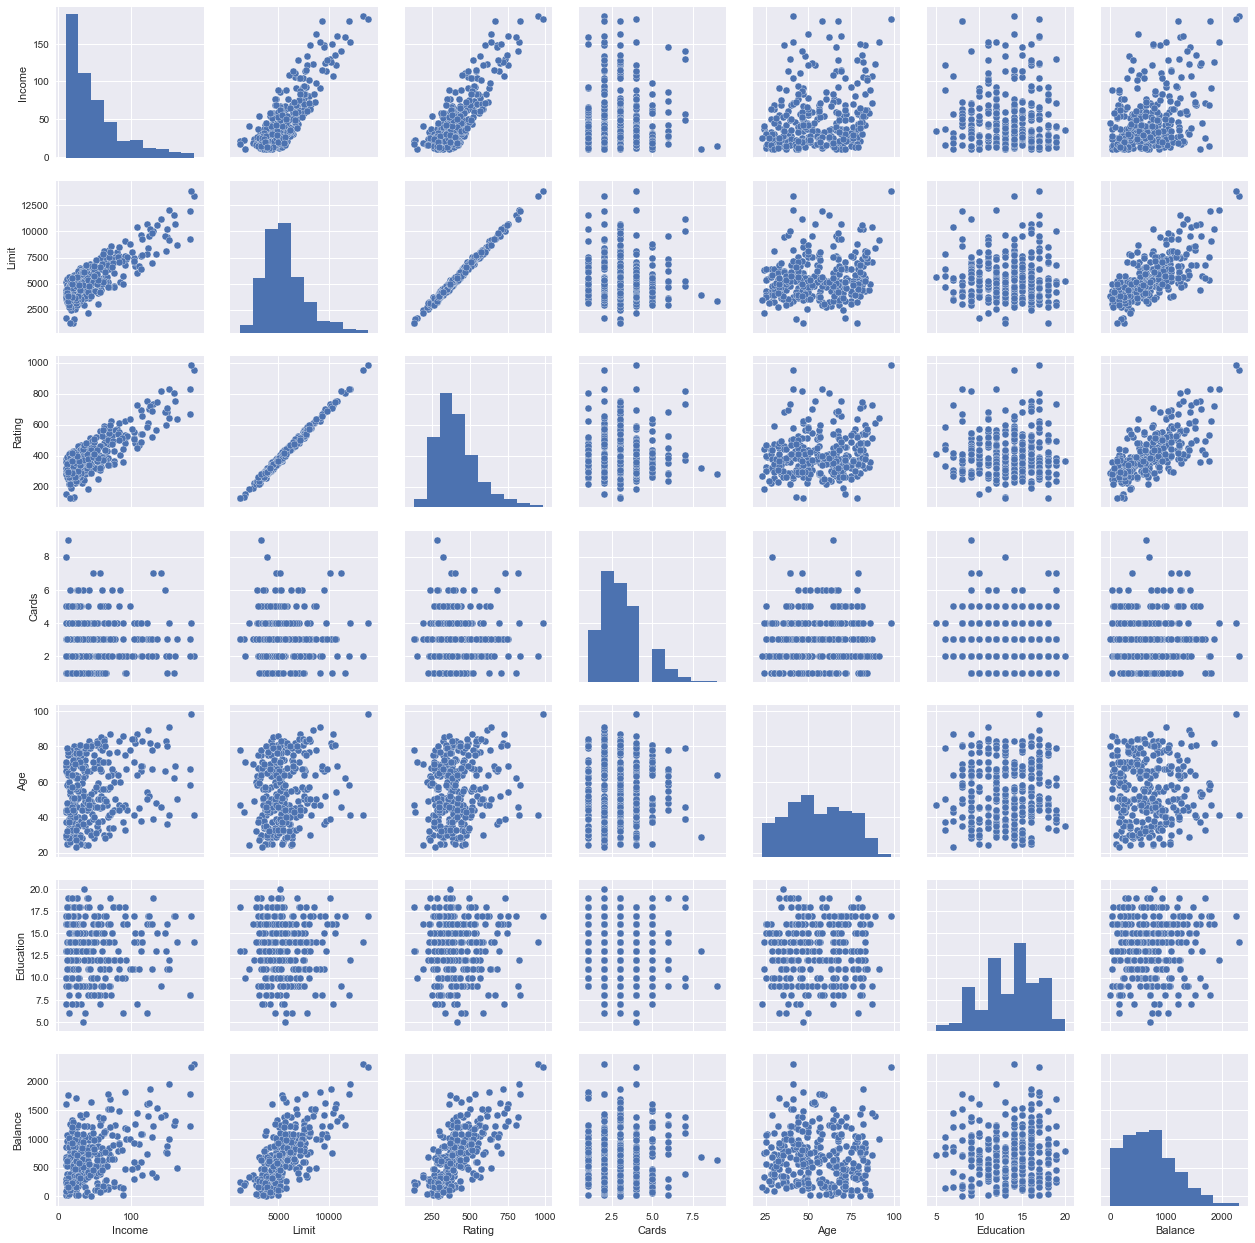

In [5]:
# #make histograms of all the variables
# data.hist(bins=50,figsize=(20,15))
# plt.show()

# g = sns.pairplot(iris, hue="species")
# sns.pairplot(data,hue='Ethnicity')
# sns.pairplot(data,hue='Student')
sns.pairplot(data)


sns.despine()

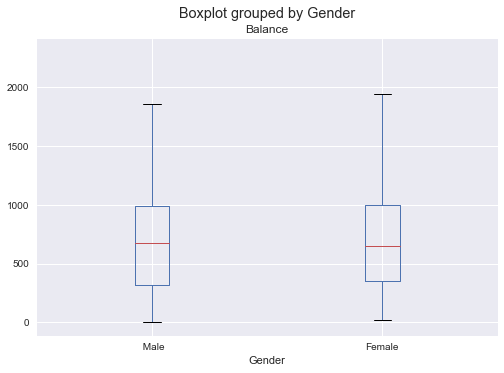

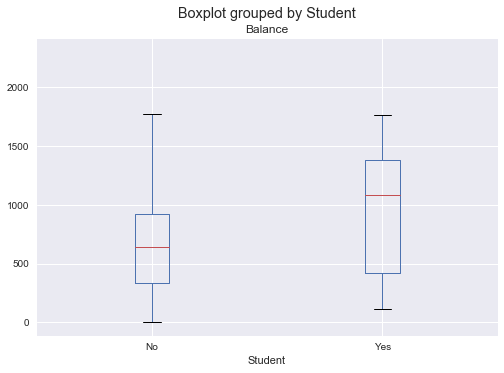

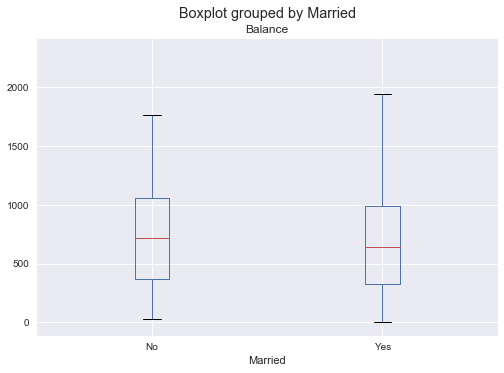

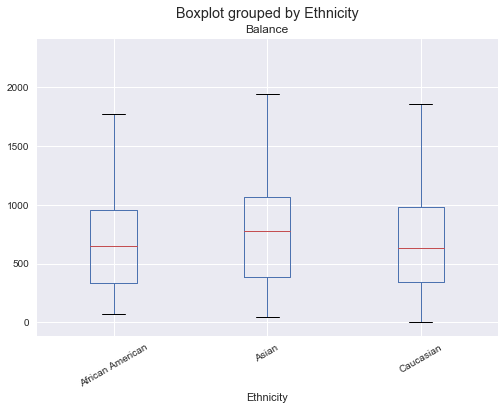

In [30]:
data.boxplot('Balance',by='Gender')
plt.show()
data.boxplot('Balance',by='Student')
plt.show()
data.boxplot('Balance',by='Married')
plt.show()
data.boxplot('Balance',by='Ethnicity',rot=30)
plt.show()



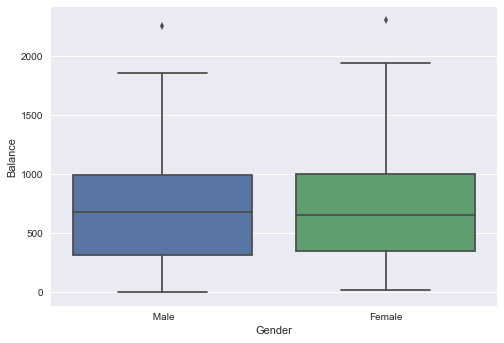

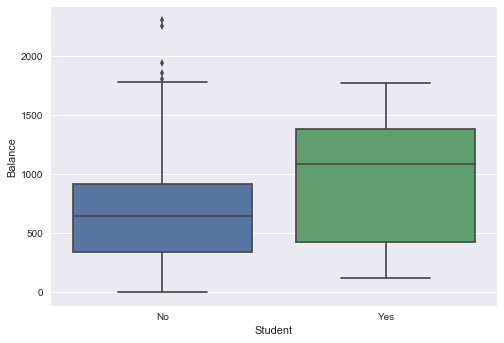

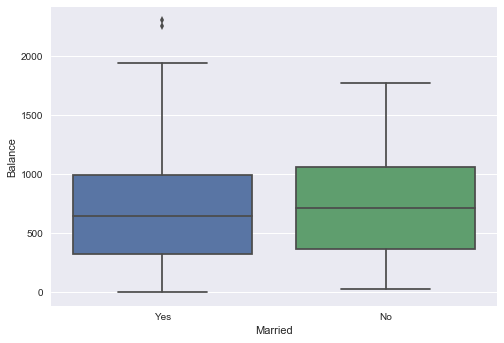

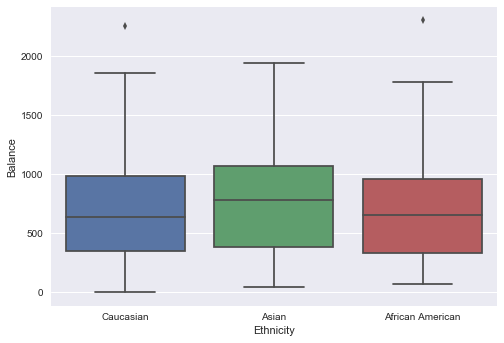

In [23]:
# ax = sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="Set3")
sns.boxplot(y='Balance',x='Gender',data=data)
plt.show()
sns.boxplot(y='Balance',x='Student',data=data)
plt.show()
sns.boxplot(y='Balance',x='Married',data=data)
plt.show()
sns.boxplot(y='Balance',x='Ethnicity',data=data)
plt.show()
sns.despine()

In [7]:
data.shape

(294, 11)

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
type(data.drop('Balance',axis=1))

pandas.core.frame.DataFrame

In [10]:
import statsmodels.formula.api as smf

In [11]:
### basic linear regression (without variable selection)

# adding '1' as a predictor forces the inclusion of an intercept
# model = smf.ols(formula='DLHRWAGE ~ 1 + DEDUC1 + AGE + AGESQ + WHITEH + MALEH + EDUCH + \
#                      WHITEL + MALEL + EDUCL + DEDUC2 + DTEN + DMARRIED + DUNCOV', data=twinTrain).fit()
model = smf.ols(formula='Balance ~ 1 + Income + Limit + Rating + Cards + Age + Education + \
                Gender + Student + Married + Ethnicity',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     94.99
Date:                Tue, 09 Jan 2018   Prob (F-statistic):           4.95e-88
Time:                        11:42:02   Log-Likelihood:                -1985.2
No. Observations:                 294   AIC:                             3994.
Df Residuals:                     282   BIC:                             4039.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -543.4223     90.126     -6.030      0.000    -720.828    -366.016
Gender[T.Female]         -19.7824     24.938     -0.793      0.428     -68.870      29.306
Student[T.Yes]           535.7803     39.204     13.666      0.000     458.610     612.950
Married[T.Yes]           -14.2811     26.093     -0.547      0.585     -65.642      37.080
Ethnicity[T.Asian]        53.3056     36.427      1.463      0.144     -18.398     125.009
Ethnicity[T.Caucasian]    41.4142     30.790      1.345      0.180     -19.192     102.021
Income                    -8.4707      0.605    -13.992      0.000      -9.662      -7.279
Limit                      0.3681      0.082      4.502      0.000       0.207       0.529
Rating                    -0.9379      1.207     -0.777      0.438      -3.313       1.437
Cards                     20.5028     10.235      2.003      0.046       0.356      40.650
Age                       -2.2444      0.734     -3.056      0.002      -3.690      -0.799
Education                 -0.1777      3.957     -0.045      0.964      -7.966       7.611
==============================================================================
Omnibus:                        2.257   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                1.956
Skew:                           0.178   Prob(JB):                        0.376
Kurtosis:                       3.182   Cond. No.                     4.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## This one doesn't work
## Without a constant
# import statsmodels.api as sm

# # X = df["RM"]
# # y = target["MEDV"]

X = data[['']]
y = data.Balance
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# # Print out the statistics
model.summary()

In [1]:
pwd

'C:\\Users\\Matt\\Documents\\Matt BYU\\10 Winter 2018\\Stat 536\\EDA 1 Credit'